In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print ("Packages loaded.")

Packages loaded.


In [2]:
def extract_percent(_tokens,_key):
    _selItem = [x for x in _tokens if (_key in x) & ('%' in x)][0]
    _selItem = _selItem.replace(_key,'')
    _selItem = _selItem.replace(':','')
    _selItem = _selItem.replace('%','')
    return (float)(_selItem) 
def parse_accuracies(_txtList):
    nConfig = len(_txtList) # Number of configurations
    trainAccrs = np.zeros(shape=(nConfig,(int)(1e3)))
    testAccrs = np.zeros(shape=(nConfig,(int)(1e3)))
    valAccrs = np.zeros(shape=(nConfig,(int)(1e3)))
    for fIdx,fName in enumerate(_txtList):
        nEpoch = sum(1 for line in open(fName)) # Number of epochs
        for lIdx,eachLine in enumerate(open(fName,'r')): # For each line
            if lIdx==0: continue
            trainAccr = extract_percent(eachLine.split(' '),'train')
            testAccr = extract_percent(eachLine.split(' '),'test')
            valAccr = extract_percent(eachLine.split(' '),'val')
            trainAccrs[fIdx,lIdx-1] = trainAccr
            testAccrs[fIdx,lIdx-1] = testAccr
            valAccrs[fIdx,lIdx-1] = valAccr
            fNameRfn = fName.replace('../res/res_mnist_','')
            fNameRfn = fNameRfn.replace('.txt','')  
    return trainAccrs,testAccrs,valAccrs

In [3]:
mode_str_list = ['cn_cls_cifar10_pairflip_rate45',
                 'cn_cls_cifar10_symmetric_rate20',
                 'cn_cls_cifar10_symmetric_rate50']

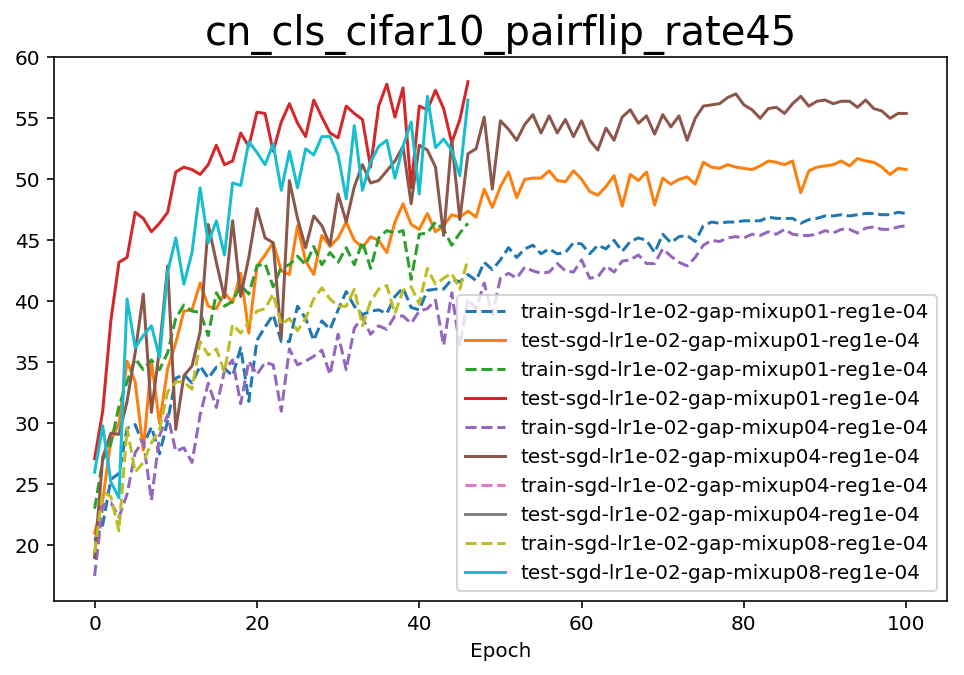

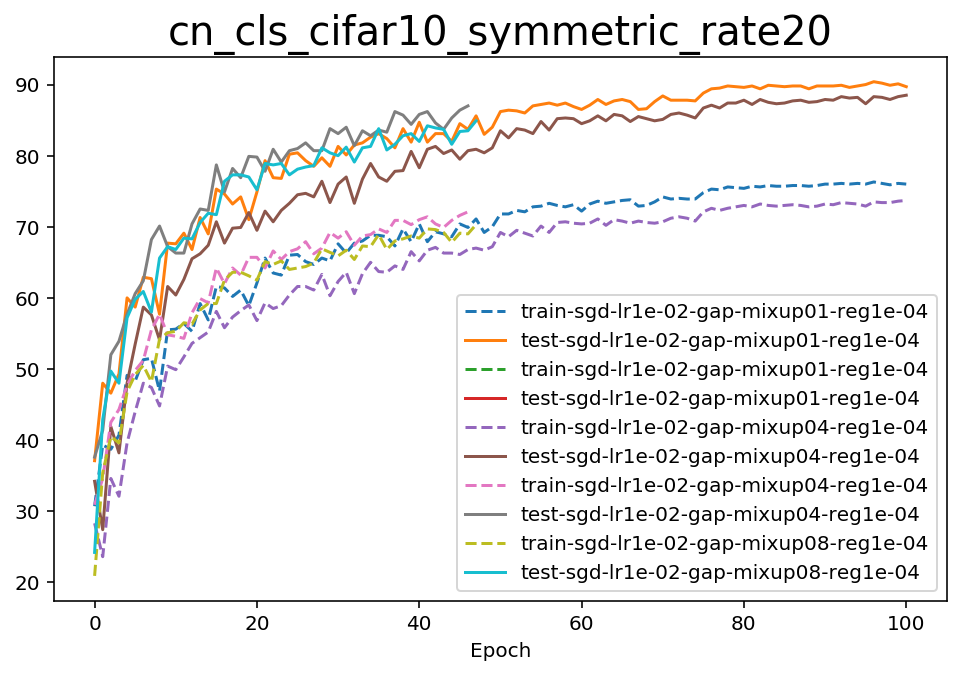

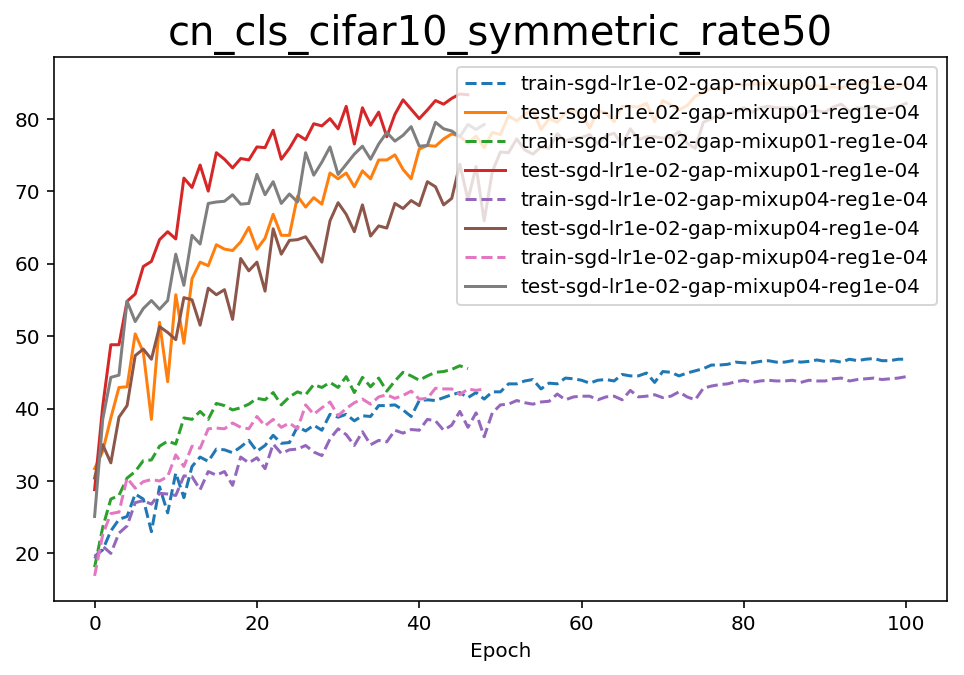

In [9]:
for mode_str in mode_str_list:
    
    txtList = sorted(glob.glob('res/res_%s*'%(mode_str)))
    trainAccrs,testAccrs,_ = parse_accuracies(txtList)
    for txt_str in txtList:
        info_str = txt_str.replace("res/res_cn_cifar10_",'')
        # print (info_str)
        
    if len(txtList) > 0:
        plt.figure(figsize=(8,5))
        for txt_idx in range(len(txtList)):

            maxEpoch = np.where(trainAccrs[txt_idx,:]==0)[0][0]

            txt_str = txtList[txt_idx]
            # print (txt_str) # print-out raw text

            err_type = txt_str.split('_')[4]
            err_rate = txt_str.split('_')[5]
            lr = txt_str.split('_')[6]
            gap = txt_str.split('_')[11]
            mixup = txt_str.split('_')[12]
            optm = txt_str.split('_')[13]
            max_epoch = txt_str.split('_')[15]
            rcoef = txt_str.split('_')[16].replace('.txt','')

            plt.plot(trainAccrs[txt_idx,:maxEpoch],'--',label='train-%s-%s-%s-%s-reg%s'%(optm,lr,gap,mixup,rcoef[-5:]))
            plt.plot(testAccrs[txt_idx,:maxEpoch],'-',label='test-%s-%s-%s-%s-reg%s'%(optm,lr,gap,mixup,rcoef[-5:]))
        plt.title(mode_str,fontsize=20)
        plt.legend()
        plt.xlabel('Epoch')
        plt.show()